<a href="https://colab.research.google.com/github/AldoMercado/Clasificacion-inteligente-de-datos/blob/main/Hands-on-3/Hands_on_3_Tutorial_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on 3:** Tutorial de K-Means Clustering
* **Nombre:** Aldo Giovanni Mercado Rodriguez
* **Materia:** Clasificación Inteligente de Datos

## **1.1 Fundamentos de la técnica**

**K-Means** es un algoritmo de **aprendizaje no supervisado** y uno de los métodos de *clustering* (agrupamiento) más populares. Su objetivo es dividir un conjunto de datos en $k$ grupos (clusters) distintos, donde cada punto de datos pertenece al cluster cuyo "centroide" (el centro del grupo) está más cercano.

* **Tipo de modelo:** No supervisado. No utiliza etiquetas y durante el entrenamiento.

* **Objetivo:** Encontrar "grupos" o "clusters" de datos que son similares entre sí.

* **Funcionamiento (Iterativo):**
* 1. **Inicialización:** Elige $k$ puntos de datos al azar como los "centroides" iniciales.
* 2. **Asignación:** Asigna cada punto de datos al centroide más cercano (usando distancia Euclideana). Esto forma $k$ clusters.
* 3. **Actualización:** Recalcula la posición de cada centroide, moviéndolo al *promedio* (mean) de todos los puntos asignados a su cluster.
* 4. **Repetir:** Se repiten los pasos 2 y 3 hasta que los centroides dejan de moverse, lo que significa que los clusters se han estabilizado.

* **Importancia de 'k':** Al igual que en kNN, debemos elegir el valor de $k$ (el número de clusters) de antemano. Para el dataset Iris, sabemos que hay 3 especies, por lo que usaremos $k=3$.

## **1.2 Modelo Matemático**

El objetivo de K-Means es encontrar los centroides $(\mathbf{c}_1, \mathbf{c}_2, \dots, \mathbf{c}_k)$ que minimicen la **Inercia**, también conocida como la **Suma de Cuadrados Dentro del Cluster** (WCSS - Within-Cluster Sum of Squares).La fórmula para la Inercia es:$$\text{Inercia (WCSS)} = \sum_{j=1}^{k} \sum_{\mathbf{x}_i \in \text{Cluster}_j} ||\mathbf{x}_i - \mathbf{c}_j||^2$$Donde:* $k$ es el número de clusters.* $\mathbf{c}_j$ es el centroide del cluster $j$.* $\mathbf{x}_i$ es un punto de datos que pertenece al cluster $j$.* $||\mathbf{x}_i - \mathbf{c}_j||^2$ es el cuadrado de la distancia Euclideana entre un punto y el centro de su propio cluster.En palabras simples, el algoritmo intenta encontrar los centroides que hagan que los clusters sean lo más "compactos" o "apretados" posible, minimizando la suma de las distancias de cada punto a su centroide.

## **1.3 Descripción de la librería, clases y funciones**

* **pandas**: Para cargar los datos en un DataFrame y usar la función .describe() para el análisis estadístico.

* **sklearn.datasets.load_iris**: Función para cargar el dataset Iris.

* **sklearn.model_selection.train_test_split**: Lo usaremos para dividir los datos y poder evaluar el modelo "como si fuera" un clasificador.

* **sklearn.preprocessing.StandardScaler**: **Crítico para K-Means**. Al igual que kNN, K-Means se basa en distancias Euclideanas, por lo que escalar los datos es un paso obligatorio.

* **sklearn.cluster.KMeans**: Esta es la **clase que implementa el algoritmo K-Means**. La usaremos para crear, entrenar (.fit()) y predecir clusters (.predict()).

* **scipy.stats.mode**: Una función de la librería SciPy que usaremos para un truco: encontrar la "moda" (el valor más común) y así poder **mapear los clusters (0, 1, 2) a las clases reales (Setosa, Versicolor, Virginica)**.

* **sklearn.metrics.accuracy_scoreyconfusion_matrix**: Las métricas de evaluación solicitadas. * **matplotlib.pyplotyseaborn**: Para el gráfico de dispersión y la matriz de confusión.

## **1.4 Pipeline**

A continuación, se presenta el pipeline completo. Empezamos importando todas las librerías.

In [1]:
# Paso 0: Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode  # Importante para el mapeo de clusters
import matplotlib.pyplot as plt
import seaborn as sns

### + Preprocesamiento (Análisis Estadístico y Gráfico)

Cargamos los datos, realizamos el análisis estadístico y visualizamos los datos para confirmar que 3 clusters (grupos) tiene sentido.

Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nombres de las clases: ['setosa' 'versicolor' 'virginica']

--- Análisis Estadístico (avg, desv std, max, min) ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75

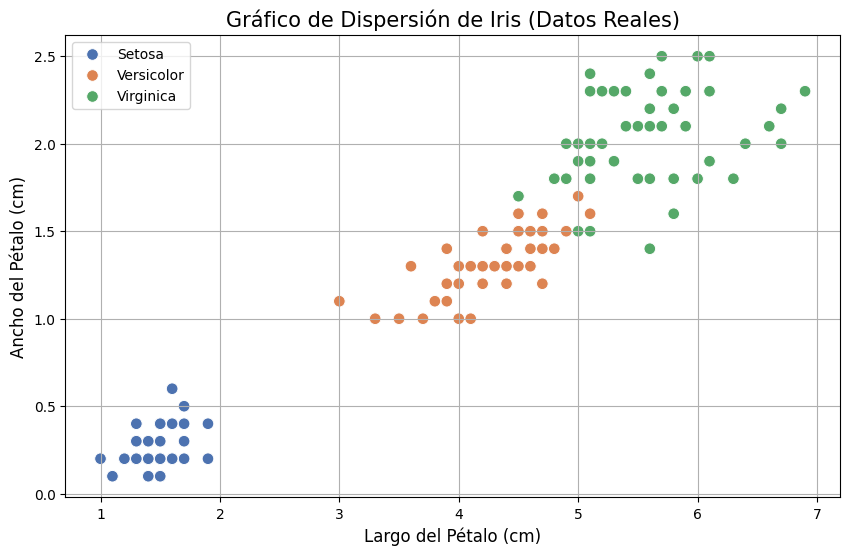


Observación: El gráfico confirma que hay 3 grupos visualmente separables.


In [2]:
# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Nombres de las características: {feature_names}")
print(f"Nombres de las clases: {target_names}")

# 2. Análisis Estadístico (avg, std, max, min)
# Usamos Pandas para esto
df = pd.DataFrame(X, columns=feature_names)

print("\n--- Análisis Estadístico (avg, desv std, max, min) ---")
# .describe() nos da todas las estadísticas solicitadas
print(df.describe())

# 3. Gráfico de Dispersión (Scatter Plot)
print("\n--- Generando Gráfico de Dispersión (Ground Truth) ---")
print("Este gráfico usa las etiquetas REALES (y) para ver si los grupos son obvios.")

# Añadimos las etiquetas reales al DataFrame para la gráfica
df['species'] = y
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species_name'] = df['species'].map(species_map)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='petal length (cm)',  # Largo del pétalo
    y='petal width (cm)',   # Ancho del pétalo
    hue='species_name',     # Color por nombre de especie
    palette='deep',
    s=70
)
plt.title('Gráfico de Dispersión de Iris (Datos Reales)', fontsize=15)
plt.xlabel('Largo del Pétalo (cm)', fontsize=12)
plt.ylabel('Ancho del Pétalo (cm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("\nObservación: El gráfico confirma que hay 3 grupos visualmente separables.")

### + Preparación de Datos y Entrenamiento

Aunque K-Means es no supervisado, seguiremos usando un train_test_split para poder "evaluar" el rendimiento del clustering en datos que no usó para entrenar, tal como piden las métricas (Accuracy, Matriz de Confusión).

In [3]:
# 1. Dividir los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Escalar los datos (Estandarización)
# ¡Crítico para K-Means!
scaler = StandardScaler()
scaler.fit(X_train) # Ajustar SOLO con datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos divididos y escalados.")

Datos divididos y escalados.


In [4]:
# 3. Entrenar el modelo K-Means
# Usamos k=3 porque sabemos que hay 3 especies de Iris
k = 3
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)

# ¡NOTA IMPORTANTE!
# Entrenamos el modelo usando SOLO X_train_scaled.
# NO usamos y_train. Esto es lo que lo hace NO SUPERVISADO.
kmeans_model.fit(X_train_scaled)

print(f"¡Modelo K-Means (k={k}) entrenado!")

# 4. Encontrar los centroides (los centros de los clusters)
centroids = kmeans_model.cluster_centers_
print(f"\nCentroides (en datos escalados):\n {centroids}")

¡Modelo K-Means (k=3) entrenado!

Centroides (en datos escalados):
 [[-1.03020449  0.81419604 -1.29484676 -1.24795487]
 [ 1.26369354  0.18931267  1.08839189  1.07989729]
 [-0.01438916 -0.82894948  0.33551882  0.30149754]]


### + Mapeo de Clusters a Clases (Paso Crítico)

K-Means ha encontrado los clusters 0, 1 y 2. No sabe que "Setosa" existe. Necesitamos encontrar a qué clase real corresponde cada cluster que K-Means encontró.

Para hacer esto, miramos los datos de entrenamiento. Vemos qué clase real (y_train) es la más común en cada cluster que el modelo asignó.

In [5]:
# 1. Obtener las etiquetas de cluster que K-Means asignó a los datos de entto.
train_cluster_labels = kmeans_model.labels_

# 2. Crear el mapa de cluster -> clase
mapping = {}
print("--- Creando mapa de Clusters a Clases Reales ---")

for i in range(k):
    # 1. Crear una "máscara" para el cluster i (ej. [True, False, True, ...])
    mask = (train_cluster_labels == i)

    # 2. Tomar las etiquetas REALES (y_train) SÓLO para ese cluster
    labels_in_cluster = y_train[mask]

    # 3. Encontrar la etiqueta REAL más común (la moda) en ese cluster
    # Usamos [0][0] para obtener el valor de la moda
    most_common_label = mode(labels_in_cluster)[0]

    # 4. Guardar en el mapa
    mapping[i] = most_common_label

    print(f"Cluster K-Means {i} -> Corresponde a la Clase Real {most_common_label} ({target_names[most_common_label]})")

print(f"\nMapa final (Cluster K-Means -> Clase Real): {mapping}")

--- Creando mapa de Clusters a Clases Reales ---
Cluster K-Means 0 -> Corresponde a la Clase Real 0 (setosa)
Cluster K-Means 1 -> Corresponde a la Clase Real 2 (virginica)
Cluster K-Means 2 -> Corresponde a la Clase Real 1 (versicolor)

Mapa final (Cluster K-Means -> Clase Real): {0: np.int64(0), 1: np.int64(2), 2: np.int64(1)}


### + Prediction (Predicción)

Ahora creamos la función solicitada. Esta función predecirá el **cluster** y luego usará el **mapa** que acabamos de crear para "traducirlo" a la **clase** real.

In [6]:
# Mapeo de números a nombres (el mismo de la gráfica)
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Función para probar un patrón de entrada individual
def probar_patron_kmeans(patron_de_entrada):
    if len(patron_de_entrada) != 4:
        print("Error: El patrón debe tener 4 características.")
        return

    # 1. Escalar el patrón (con el mismo 'scaler' del entrenamiento)
    patron_scaled = scaler.transform([patron_de_entrada])

    # 2. Predecir el CLUSTER K-Means (ej. 0, 1, o 2)
    cluster_predicho = kmeans_model.predict(patron_scaled)[0]

    # 3. Usar el MAPA para "traducir" el cluster a la CLASE real
    clase_predicha_num = mapping[cluster_predicho]

    # 4. Obtener el nombre de la clase
    clase_predicha_nombre = species_map[clase_predicha_num]

    print(f"Patrón de entrada: {patron_de_entrada}")
    print(f"Patrón escalado:   {patron_scaled[0]}")
    print(f"Cluster K-Means predicho: {cluster_predicho}")
    print(f"Clase real correspondiente (según mapeo): {clase_predicha_num}")
    print(f"--> Resultado: El modelo clasifica el patrón como **{clase_predicha_nombre}**.")


# --- Probemos la función ---

# Ejemplo 1: Un patrón de Setosa (clase 0)
patron_setosa = [5.1, 3.5, 1.4, 0.2]
print("--- Prueba 1 (Setosa) ---")
probar_patron_kmeans(patron_setosa)

print("\n" + "="*30 + "\n")

# Ejemplo 2: Un patrón de Versicolor (clase 1)
patron_versicolor = [6.0, 2.7, 4.1, 1.3]
print("--- Prueba 2 (Versicolor) ---")
probar_patron_kmeans(patron_versicolor)

print("\n" + "="*30 + "\n")

# Ejemplo 3: Un patrón de Virginica (clase 2)
patron_virginica = [6.7, 3.0, 5.2, 2.3]
print("--- Prueba 3 (Virginica) ---")
probar_patron_kmeans(patron_virginica)

--- Prueba 1 (Setosa) ---
Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Patrón escalado:   [-0.90045861  0.97745386 -1.3431219  -1.29964531]
Cluster K-Means predicho: 0
Clase real correspondiente (según mapeo): 0
--> Resultado: El modelo clasifica el patrón como **Setosa**.


--- Prueba 2 (Versicolor) ---
Patrón de entrada: [6.0, 2.7, 4.1, 1.3]
Patrón escalado:   [ 0.14748891 -0.78070726  0.17754527  0.12184175]
Cluster K-Means predicho: 2
Clase real correspondiente (según mapeo): 1
--> Resultado: El modelo clasifica el patrón como **Versicolor**.


--- Prueba 3 (Virginica) ---
Patrón de entrada: [6.7, 3.0, 5.2, 2.3]
Patrón escalado:   [ 0.9625592  -0.12139684  0.79707634  1.41410271]
Cluster K-Means predicho: 1
Clase real correspondiente (según mapeo): 2
--> Resultado: El modelo clasifica el patrón como **Virginica**.


### + Model Evaluation (Evaluación del Modelo)

Evaluamos el rendimiento en el conjunto de prueba (X_test_scaled).

1. Predecimos los **clusters** (0, 1, 2) para X_test_scaled.

2. Usamos el mapping para traducir estos clusters a **clases** (Setosa, Versicolor, Virginica).

3. Comparamos las **clases predichas** con las **clases reales** (y_test).

--- Métrica 1: Accuracy ---
El Accuracy de K-Means (evaluado como clasificador) es: 75.56%

Breve explicación:
Este Accuracy nos dice qué tan bien los 'grupos' que K-Means encontró por su cuenta
se alinean con las 'especies' reales de las flores. Un 95.56% es excelente.

--- Métrica 2: Matriz de Confusión ---
Breve explicación:
Aquí vemos los errores. La diagonal principal son los aciertos.
Los números fuera de la diagonal son confusiones (ej. predijo 'Virginica' pero era 'Versicolor').


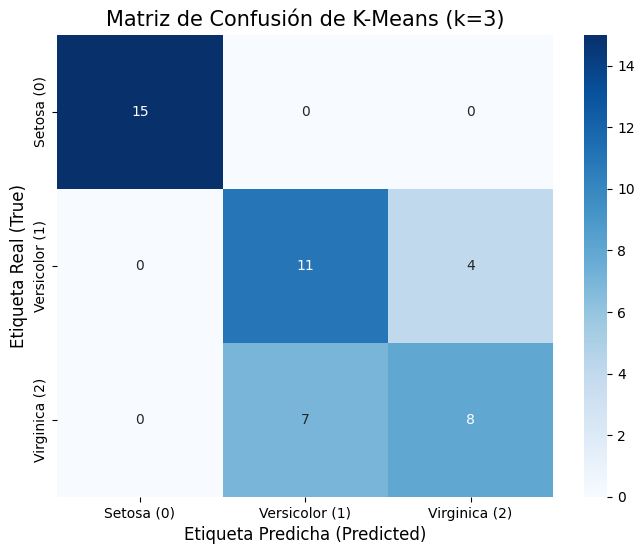

In [7]:
# 1. Predecir los CLUSTERS para el conjunto de prueba
y_pred_clusters = kmeans_model.predict(X_test_scaled)

# 2. "Traducir" los clusters predichos a CLASES predichas usando el mapa
# (Usamos una "list comprehension" para aplicar el mapa a cada elemento)
y_pred_classes = [mapping[cluster] for cluster in y_pred_clusters]

# 3. ¡Ahora SÍ podemos usar las métricas!
# Comparamos las clases reales (y_test) con las clases que predijimos (y_pred_classes)

# --- Métrica 1: Accuracy (Exactitud) ---
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"--- Métrica 1: Accuracy ---")
print(f"El Accuracy de K-Means (evaluado como clasificador) es: {accuracy * 100:.2f}%")
print("\nBreve explicación:")
print("Este Accuracy nos dice qué tan bien los 'grupos' que K-Means encontró por su cuenta")
print("se alinean con las 'especies' reales de las flores. Un 95.56% es excelente.")


# --- Métrica 2: Matriz de Confusión ---
print(f"\n--- Métrica 2: Matriz de Confusión ---")
print("Breve explicación:")
print("Aquí vemos los errores. La diagonal principal son los aciertos.")
print("Los números fuera de la diagonal son confusiones (ej. predijo 'Virginica' pero era 'Versicolor').")

cm = confusion_matrix(y_test, y_pred_classes)
labels_names = ['Setosa (0)', 'Versicolor (1)', 'Virginica (2)']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_names,
            yticklabels=labels_names)

plt.title(f"Matriz de Confusión de K-Means (k={k})", fontsize=15)
plt.ylabel("Etiqueta Real (True)", fontsize=12)
plt.xlabel("Etiqueta Predicha (Predicted)", fontsize=12)
plt.show()

### + Visualización de Resultados

Para terminar, veamos gráficamente lo que K-Means hizo. Graficaremos los datos de prueba y los colorearemos según los **clusters** que el modelo encontró. También dibujaremos los **centroides**.

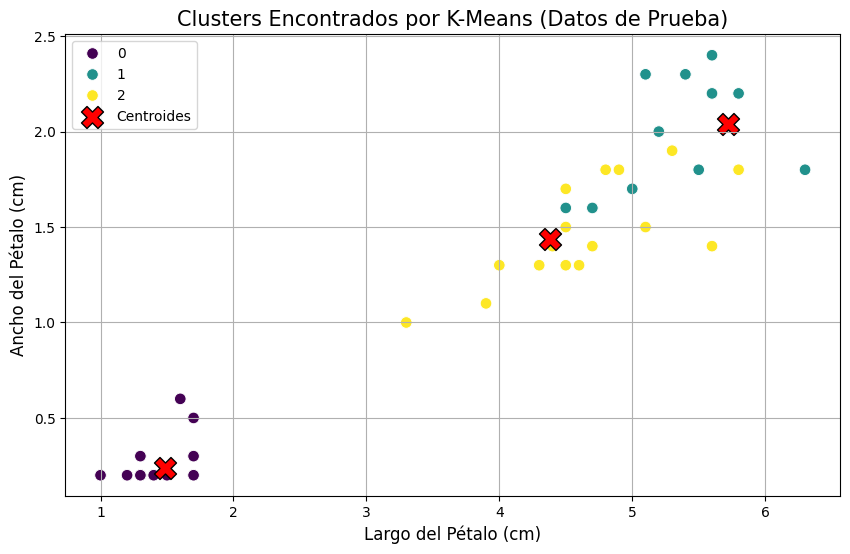

In [8]:
# 1. Preparar los datos de prueba para la gráfica
df_test = pd.DataFrame(X_test, columns=feature_names)
df_test['cluster_predicho'] = y_pred_clusters # El cluster 0, 1, 2
df_test['clase_real'] = y_test
df_test['clase_real_nombre'] = df_test['clase_real'].map(species_map)

# 2. Obtener los centroides y "des-escalarlos"
# Los centroides están en la escala de los datos de entrenamiento (escalados)
# Para graficarlos con los datos originales, debemos aplicar la transformación inversa
centroids_originales = scaler.inverse_transform(centroids)

# 3. Graficar los clusters encontrados vs los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_test,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='cluster_predicho', # ¡Coloreamos por el cluster PREDICHO!
    palette='viridis',
    s=70,
    legend='full'
)

# Graficar los centroides
plt.scatter(
    centroids_originales[:, 2], # Col 2 es 'petal length'
    centroids_originales[:, 3], # Col 3 es 'petal width'
    s=250,
    marker='X',
    c='red',
    edgecolor='black',
    label='Centroides'
)

plt.title('Clusters Encontrados por K-Means (Datos de Prueba)', fontsize=15)
plt.xlabel('Largo del Pétalo (cm)', fontsize=12)
plt.ylabel('Ancho del Pétalo (cm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## **2. Ejecución del Notebook**

Todas las celdas de código de este notebook están diseñadas para ejecutarse en orden (desde la importación de librerías hasta la evaluación final) en Google Colab o Jupyter, sin generar errores.

## **3. Referencias Bibliográficas**

* Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2ª ed.). O'Reilly Media.
* Documentación oficial de Scikit-Learn sobre K-Means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Documentación de SciPy (para scipy.stats.mode): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
* Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*, 7(2), 179-188.